***
# Analysis of the penguins data set
***


## BACKGROUND

The analysis started off by importing the necessary libraries needed for data analysis, exploration, manipulation and visualization and the [Palmer penguins dataset](https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv). The palmer penguin dataset has 344 rows and 7 columns and each of the row represents a penguin included in the study. The  dataset consists of three species of penguins; Adelie, Gentoo and Chinstrap found in Biscoe, Dream and Torgersen Island in Australia.


### Libraries/Prerequisites
Pandas was used for exploring the dataframe, Numpy - numerical arrays was utilized for data analysis while Matplotlib and seaborn was used for plotting data.


In [70]:
#importing the libraries 

import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats
sns.set_theme() #setting seaborn as default style for plots when using matplotlib
print (np.__version__)

1.24.3


In [71]:
#importing the raw penguin dataset using pandas and assigns the resulting dataframe to the variable penguin

palmer_penguins = pd.read_csv("https://raw.githubusercontent.com/mwaskom/seaborn-data/master/penguins.csv")
palmer_penguins

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
...,...,...,...,...,...,...,...
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,NaN
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


## Data Exploration and understanding the data structure.
The data head and tail functions were used for a quick scan of the beginning and end of the data. The to_string() was used to present the data in a scrollable format and a summary statistics of the data was performed with  describe().

In [72]:
# diplaying the first 5 rows of the data

print(palmer_penguins.head())


  species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
0  Adelie  Torgersen            39.1           18.7              181.0   
1  Adelie  Torgersen            39.5           17.4              186.0   
2  Adelie  Torgersen            40.3           18.0              195.0   
3  Adelie  Torgersen             NaN            NaN                NaN   
4  Adelie  Torgersen            36.7           19.3              193.0   

   body_mass_g     sex  
0       3750.0    MALE  
1       3800.0  FEMALE  
2       3250.0  FEMALE  
3          NaN     NaN  
4       3450.0  FEMALE  


In [73]:
# displaying the last 5 rows of the dataset
print (palmer_penguins.tail())


    species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  \
339  Gentoo  Biscoe             NaN            NaN                NaN   
340  Gentoo  Biscoe            46.8           14.3              215.0   
341  Gentoo  Biscoe            50.4           15.7              222.0   
342  Gentoo  Biscoe            45.2           14.8              212.0   
343  Gentoo  Biscoe            49.9           16.1              213.0   

     body_mass_g     sex  
339          NaN     NaN  
340       4850.0  FEMALE  
341       5750.0    MALE  
342       5200.0  FEMALE  
343       5400.0    MALE  


In [74]:
#converts the data set to string and presents it in a scrollable pattern
print (palmer_penguins.to_string()) 

       species     island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g     sex
0       Adelie  Torgersen            39.1           18.7              181.0       3750.0    MALE
1       Adelie  Torgersen            39.5           17.4              186.0       3800.0  FEMALE
2       Adelie  Torgersen            40.3           18.0              195.0       3250.0  FEMALE
3       Adelie  Torgersen             NaN            NaN                NaN          NaN     NaN
4       Adelie  Torgersen            36.7           19.3              193.0       3450.0  FEMALE
5       Adelie  Torgersen            39.3           20.6              190.0       3650.0    MALE
6       Adelie  Torgersen            38.9           17.8              181.0       3625.0  FEMALE
7       Adelie  Torgersen            39.2           19.6              195.0       4675.0    MALE
8       Adelie  Torgersen            34.1           18.1              193.0       3475.0     NaN
9       Adelie  Torgersen     

In [75]:
# Summary statistics of the numerical variables to get a basic insight of the palmer penguins dataset 

palmer_penguins.describe()


,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [76]:
# displays infromation on the missing values and data types
# some of the variables are of non-null type - not a number 
# 3 variables are type object while 4 are floating type

palmer_penguins.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 344 entries, 0 to 343
Data columns (total 7 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   species            344 non-null    object 
 1   island             344 non-null    object 
 2   bill_length_mm     342 non-null    float64
 3   bill_depth_mm      342 non-null    float64
 4   flipper_length_mm  342 non-null    float64
 5   body_mass_g        342 non-null    float64
 6   sex                333 non-null    object 
dtypes: float64(4), object(3)
memory usage: 18.9+ KB


## Data Manipulation
Scrolling through the datsets showed that the data contain some missing values represented as Not a Number (NAN). The missing values were counted using the isna and sum function.  


In [77]:
# Checking for missings values in the dataset

palmer_penguins.isna().sum()

species               0
island                0
bill_length_mm        2
bill_depth_mm         2
flipper_length_mm     2
body_mass_g           2
sex                  11
dtype: int64

In [78]:
# Selecting all the rows with NAN in the penguins dataset
palmer_penguins[palmer_penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,NaN
8,Adelie,Torgersen,34.1,18.1,193.0,3475.0,NaN
9,Adelie,Torgersen,42.0,20.2,190.0,4250.0,NaN
10,Adelie,Torgersen,37.8,17.1,186.0,3300.0,NaN
11,Adelie,Torgersen,37.8,17.3,180.0,3700.0,NaN
47,Adelie,Dream,37.5,18.9,179.0,2975.0,NaN
246,Gentoo,Biscoe,44.5,14.3,216.0,4100.0,NaN
286,Gentoo,Biscoe,46.2,14.4,214.0,4650.0,NaN
324,Gentoo,Biscoe,47.3,13.8,216.0,4725.0,NaN
336,Gentoo,Biscoe,44.5,15.7,217.0,4875.0,NaN


### Data Imputation
A copy of the original data was created before cleaning up the data as to ensure the integrity of the original data. The missing values under sex were substituted with the mode of the sex variable.

In [79]:
# Creating a copy of the dataset before manipulating the data
penguins = palmer_penguins.copy()


### Dealing with missing values
The sex column has the highest number of missing values while rows' 3 and 339 were missing a lot of variables and may be incomplete entries. The NAN in the sex column was replaced with the mode while rows 3 and 339 were dropped.

In [80]:

# Replacing the NAN in the sex column with the mode which is male

print (penguins['sex'].mode()[0])
penguins['sex'] = penguins['sex'].fillna(penguins['sex'].mode()[0])

MALE


In [81]:
#rerunning the isna showed that only two rows has the NAN
penguins[penguins.isna().any(axis=1)]

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
3,Adelie,Torgersen,NaN,NaN,NaN,NaN,MALE
339,Gentoo,Biscoe,NaN,NaN,NaN,NaN,MALE


In [82]:
# creating a copy of the dataset and dropping the rows with NAN

penguins = penguins.dropna()
penguins                     #342 rows by 7 columns as against the original 344 rows by 7 columns


,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


### Dealing with duplicates

In [83]:
# Checking for duplicates                  ?remove

penguins = penguins.drop_duplicates()


In [84]:
# Checking if any duplicates were found and dropped
penguins     # None dropped 342 rows by 7 columns still

,species,island,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g,sex
0,Adelie,Torgersen,39.1,18.7,181.0,3750.0,MALE
1,Adelie,Torgersen,39.5,17.4,186.0,3800.0,FEMALE
2,Adelie,Torgersen,40.3,18.0,195.0,3250.0,FEMALE
4,Adelie,Torgersen,36.7,19.3,193.0,3450.0,FEMALE
5,Adelie,Torgersen,39.3,20.6,190.0,3650.0,MALE
...,...,...,...,...,...,...,...
338,Gentoo,Biscoe,47.2,13.7,214.0,4925.0,FEMALE
340,Gentoo,Biscoe,46.8,14.3,215.0,4850.0,FEMALE
341,Gentoo,Biscoe,50.4,15.7,222.0,5750.0,MALE
342,Gentoo,Biscoe,45.2,14.8,212.0,5200.0,FEMALE


In [85]:
#### Sorting the data
#penguins = penguins.sort_values(by=['species'])
#print (penguins.to_string())


### Dealing with Outliers
- Boxplot
- Z-score
- Interquartile range

<Axes: xlabel='species', ylabel='body_mass_g'>

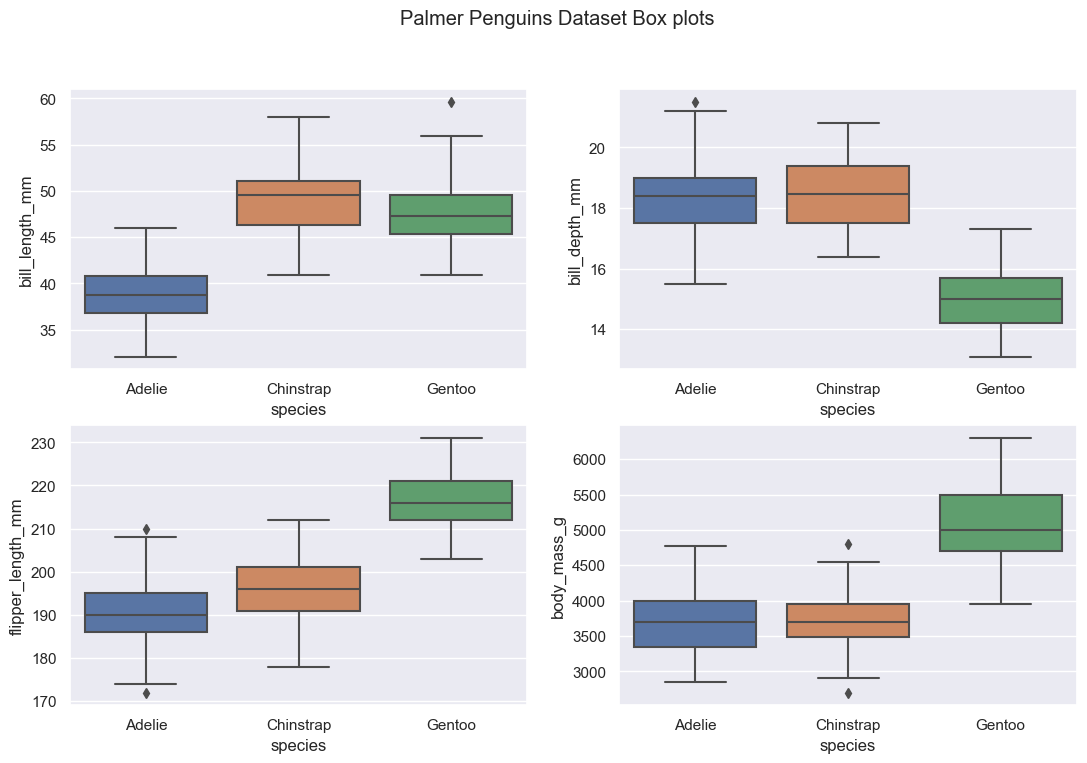

In [86]:
# Boxplot
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset Box plots')

#creating chart for each subplot
sns.boxplot(data=penguins, x='species', y='bill_length_mm', ax = ax [0, 0])
sns.boxplot(data=penguins, x='species', y='bill_depth_mm', ax = ax [0, 1])
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', ax = ax [1, 0])
sns.boxplot(data=penguins, x='species', y='body_mass_g', ax = ax [1, 1])

The boxplot showed that the dataset has  just a few outliers. One of the Gentoo specie bill length was an outlier and one for the bill depth under the Adelie specie. Two outliers each were under the variables flipper length and body mass for Adelie and Chinstrap species respectively. The Z-score was 
    

<Axes: xlabel='species', ylabel='body_mass_g'>

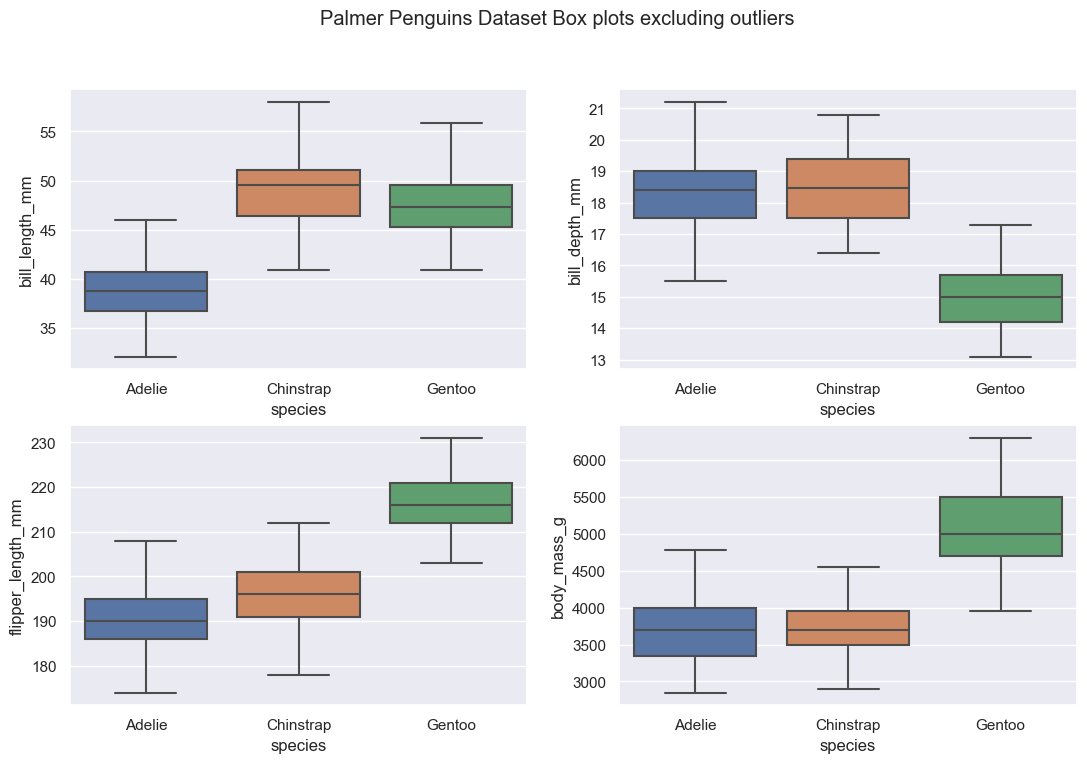

In [87]:
# Boxplots with the outliers removed
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset Box plots excluding outliers')

#creating chart for each subplot
sns.boxplot(data=penguins, x='species', y='bill_length_mm', showfliers = False, ax = ax [0, 0])
sns.boxplot(data=penguins, x='species', y='bill_depth_mm', showfliers = False,ax = ax [0, 1])
sns.boxplot(data=penguins, x='species', y='flipper_length_mm', showfliers = False, ax = ax [1, 0])
sns.boxplot(data=penguins, x='species', y='body_mass_g', showfliers = False, ax = ax [1, 1])

#### Slicing the dataset for Z-score analysis on the data subset

In [88]:
penguins['species'].value_counts()

species
Adelie       151
Gentoo       123
Chinstrap     68
Name: count, dtype: int64

In [89]:
#slicing and saving the Adelie species to a new variable
penguins_Adelie = penguins[penguins['species']=='Adelie']
penguins_Adelie.value_counts()   # to compare with the original under species


species  island     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Adelie   Biscoe     34.5            18.1           187.0              2900.0       FEMALE    1
         Dream      41.5            18.5           201.0              4000.0       MALE      1
                    42.3            21.2           191.0              4150.0       MALE      1
                    43.2            18.5           192.0              4100.0       MALE      1
                    44.1            19.7           196.0              4400.0       MALE      1
                                                                                            ..
                    36.0            17.9           190.0              3450.0       FEMALE    1
                                    18.5           186.0              3100.0       FEMALE    1
                    36.2            17.3           187.0              3300.0       FEMALE    1
                    36.3            19.5           190.

In [90]:
penguins_Gentoo = penguins[penguins['species']=='Gentoo']
penguins_Gentoo.value_counts()


species  island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Gentoo   Biscoe  40.9            13.7           214.0              4650.0       FEMALE    1
                 49.6            15.0           216.0              4750.0       MALE      1
                 49.5            16.1           224.0              5650.0       MALE      1
                 49.4            15.8           216.0              4925.0       MALE      1
                 49.3            15.7           217.0              5850.0       MALE      1
                                                                                         ..
                 45.5            15.0           220.0              5000.0       MALE      1
                                 14.5           212.0              4750.0       FEMALE    1
                                 13.9           210.0              4200.0       FEMALE    1
                                 13.7           214.0              4650.0       FEMAL

In [91]:
penguins_Chinstrap = penguins[penguins['species']=='Chinstrap']
penguins_Chinstrap.value_counts()

species    island  bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g  sex   
Chinstrap  Dream   40.9            16.6           187.0              3200.0       FEMALE    1
                   50.5            19.6           201.0              4050.0       MALE      1
                   50.9            19.1           196.0              3550.0       MALE      1
                                   17.9           196.0              3675.0       FEMALE    1
                   50.8            19.0           210.0              4100.0       MALE      1
                                                                                           ..
                   48.5            17.5           191.0              3400.0       MALE      1
                   49.0            19.5           210.0              3950.0       MALE      1
                                   19.6           212.0              4300.0       MALE      1
                   49.2            18.2           195.0          

#### Summary statistics of the numerical variables of the species subset of the Palmer Penguins

In [92]:
penguins_Adelie.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,151.000000,151.000000,151.000000,151.000000
mean,38.791391,18.346358,189.953642,3700.662252
std,2.663405,1.216650,6.539457,458.566126
min,32.100000,15.500000,172.000000,2850.000000
25%,36.750000,17.500000,186.000000,3350.000000
50%,38.800000,18.400000,190.000000,3700.000000
75%,40.750000,19.000000,195.000000,4000.000000
max,46.000000,21.500000,210.000000,4775.000000


In [107]:
penguins_Gentoo.describe()

       bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
count      123.000000     123.000000         123.000000   123.000000
mean        47.504878      14.982114         217.186992  5076.016260
std          3.081857       0.981220           6.484976   504.116237
min         40.900000      13.100000         203.000000  3950.000000
25%         45.300000      14.200000         212.000000  4700.000000
50%         47.300000      15.000000         216.000000  5000.000000
75%         49.550000      15.700000         221.000000  5500.000000
max         59.600000      17.300000         231.000000  6300.000000


In [ ]:
from tabulate import tabulate
import pyperclip
md = tabulate.tabulate(df.head(), df.columns, tablefmt='pipe')
pyperclip.copy(md)

In [111]:
from tabulate import tabulate
import pyperclip
PG = tabulate.tabulate(penguins_Gentoo.describe(), tablefmt='pipe')
pyperclip.copy(PG)

ModuleNotFoundError: No module named 'pyperclip'

In [94]:
penguins_Chinstrap.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,68.000000,68.000000,68.000000,68.000000
mean,48.833824,18.420588,195.823529,3733.088235
std,3.339256,1.135395,7.131894,384.335081
min,40.900000,16.400000,178.000000,2700.000000
25%,46.350000,17.500000,191.000000,3487.500000
50%,49.550000,18.450000,196.000000,3700.000000
75%,51.075000,19.400000,201.000000,3950.000000
max,58.000000,20.800000,212.000000,4800.000000


#### Zscore Analysis of the numerical variables of the species subset of the Palmer Penguins

In [95]:
# Creating a numerical subset of the Adelie penguins columns as a list
peng_Adelie = penguins_Adelie[['bill_length_mm', 'bill_depth_mm', 'flipper_length_mm', 'body_mass_g']]

# Z-score outlier test on the pen
Adelie_Zscore = stats.zscore(peng_Adelie)

print (Adelie_Zscore)


     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
0          0.116256       0.291636          -1.373728     0.107949
1          0.266939      -0.780427          -0.606595     0.217348
2          0.568306      -0.285629           0.774246    -0.986034
4         -0.787845       0.786435           0.467393    -0.548441
5          0.191598       1.858499           0.007112    -0.110847
..              ...            ...                ...          ...
147       -0.825516       0.044237          -0.913448    -0.493742
148       -1.051541      -0.450562           0.774246    -0.548441
149       -0.373466      -0.203162           0.467393     0.107949
150       -1.051541      -1.027827          -0.453168    -0.001449
151        1.020357       0.126703           1.694807     0.654941

[151 rows x 4 columns]


In [96]:
"""
Adelie_Zscore = peng_Adelie.apply(stats.zscore)
Outliers_Adelie = (Adelie_Zscore > 3) | (Adelie_Zscore < -3)
print (Outliers_Adelie)
"""

'\nAdelie_Zscore = peng_Adelie.apply(stats.zscore)\nOutliers_Adelie = (Adelie_Zscore > 3) | (Adelie_Zscore < -3)\nprint (Outliers_Adelie)\n'

In [97]:
Outliers_Adelie = (Adelie_Zscore > 3) | (Adelie_Zscore < -3)
print(f"bill length outliers: {peng_Adelie[Outliers_Adelie['bill_length_mm']]}")
print(f"bill depth outliers: {peng_Adelie[Outliers_Adelie['bill_depth_mm']]}")
print(f"flipper length outliers: {peng_Adelie[Outliers_Adelie['flipper_length_mm']]}")
print(f"body mass outliers: {peng_Adelie[Outliers_Adelie['body_mass_g']]}")


bill length outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
bill depth outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
flipper length outliers:      bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
129            44.1           18.0              210.0       4000.0
body mass outliers: Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []


In [98]:
Outliers_Adelie = (Adelie_Zscore > 3) | (Adelie_Zscore < -3)
print(peng_Adelie[Outliers_Adelie['bill_length_mm']])
print(peng_Adelie[Outliers_Adelie['bill_depth_mm']])
print(peng_Adelie[Outliers_Adelie['flipper_length_mm']])
print(peng_Adelie[Outliers_Adelie['body_mass_g']])



#print(peng_Adelie[Outliers_Adelie['bill_length_mm']])

Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []
     bill_length_mm  bill_depth_mm  flipper_length_mm  body_mass_g
129            44.1           18.0              210.0       4000.0
Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []


In [99]:
Outliers_Adelie_length = Outliers_Adelie['bill_length_mm']
print(peng_Adelie[Outliers_Adelie_length])

Empty DataFrame
Columns: [bill_length_mm, bill_depth_mm, flipper_length_mm, body_mass_g]
Index: []


### DATA VISUALISATION

<Axes: xlabel='body_mass_g', ylabel='Count'>

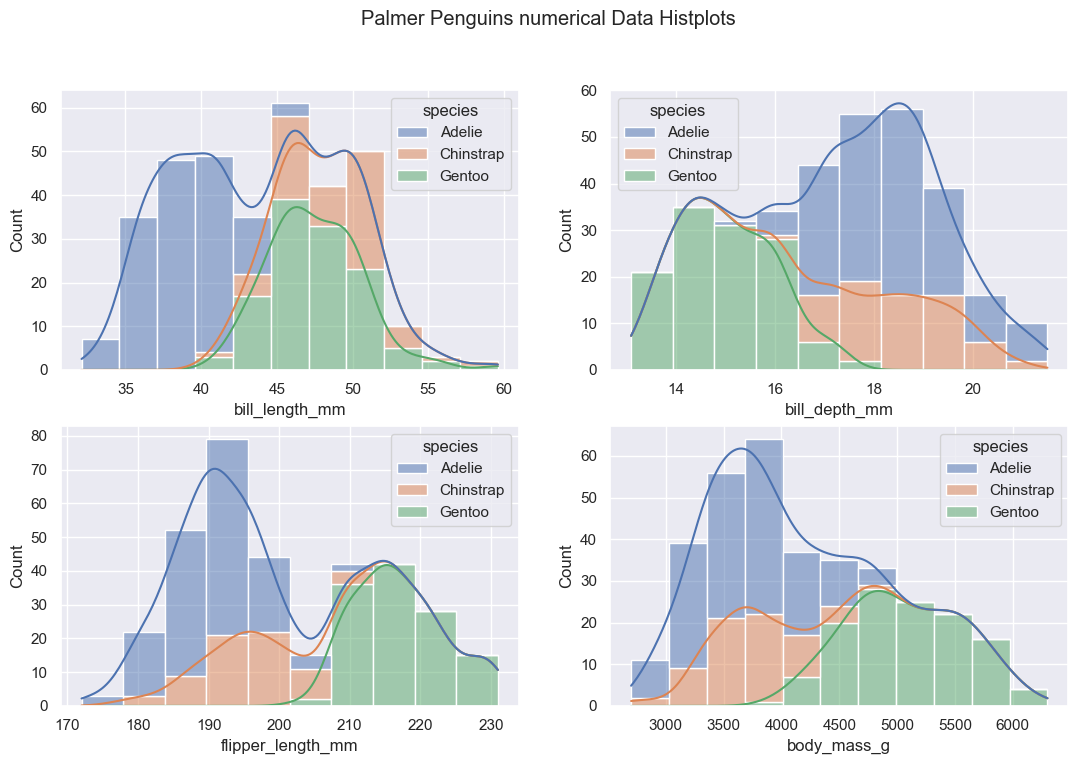

In [100]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins numerical Data Histplots')

#creating a histplot for the numerical variables
sns.histplot(data=penguins, x='bill_length_mm', hue='species',  multiple='stack', kde=True, ax = ax [0, 0])
sns.histplot(data=penguins, x='bill_depth_mm', hue='species',   multiple='stack', kde=True, ax = ax [0, 1])
sns.histplot(data=penguins, x='flipper_length_mm',hue='species',multiple='stack', kde=True, ax = ax [1, 0])
sns.histplot(data=penguins, x='body_mass_g', hue='species', multiple='stack',kde=True, ax = ax [1, 1])

<Axes: xlabel='body_mass_g', ylabel='Count'>

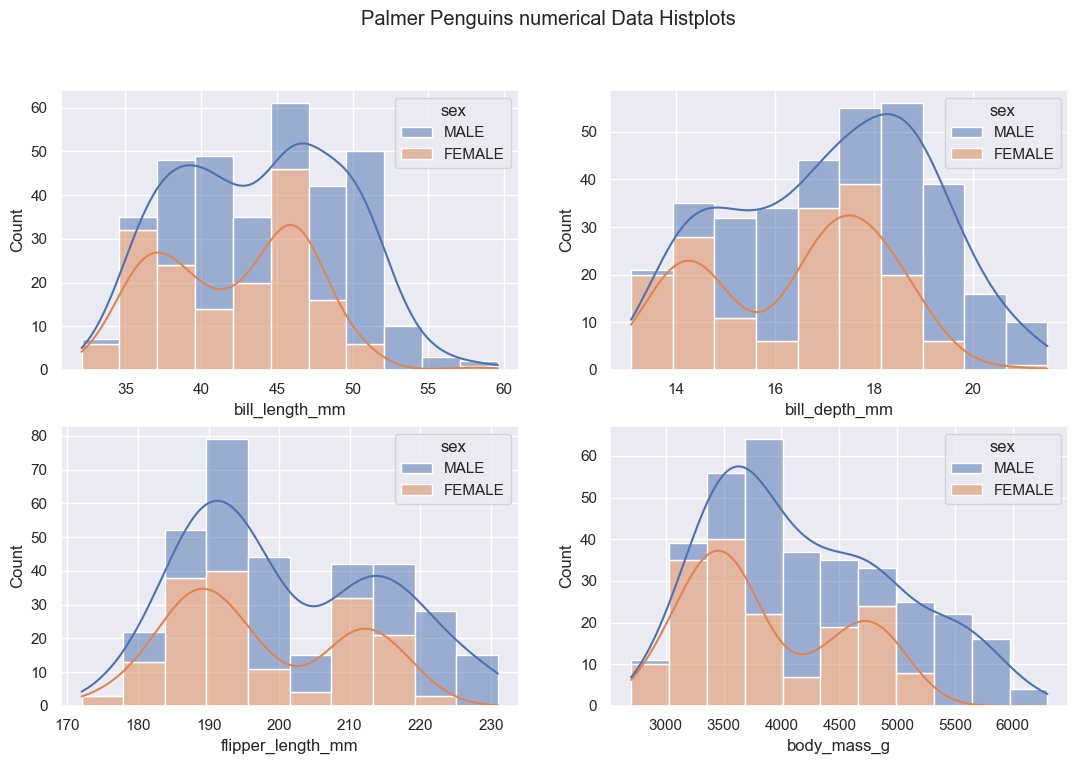

In [101]:
fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins numerical Data Histplots')

#creating chart for each subplot
sns.histplot(data=penguins, x='bill_length_mm', hue='sex',  multiple='stack', kde=True, ax = ax [0, 0])
sns.histplot(data=penguins, x='bill_depth_mm', hue='sex',   multiple='stack', kde=True, ax = ax [0, 1])
sns.histplot(data=penguins, x='flipper_length_mm',hue='sex',multiple='stack', kde=True, ax = ax [1, 0])
sns.histplot(data=penguins, x='body_mass_g', hue='sex', multiple='stack', kde=True, ax = ax [1, 1])

#### Histogram inference
From the histogram, it can be deduced that male penguins in the dataset has longer bill length, flipper length and wider bill depth than the female penguins. The males penguins also weigh more than the females


In [102]:
#relationship between 

## outlier test
## replace missing values with mean
## sex can be replaced with mode
##  sorting through the missing values

## DATA ANALYSIS
The original data was loaded in as a variable 'palmer_penguins', however the cleaned up data was saved to the variable 'penguins' which was used for the of the analysis 

In [103]:
#correlation between body mass and sex
#specie and body mass, flipper legth, bill legth etc

### Data Exploration and understanding the data structure

In [104]:
#isolating the variables in the index data
penguins.iloc[0]


species                 Adelie
island               Torgersen
bill_length_mm            39.1
bill_depth_mm             18.7
flipper_length_mm        181.0
body_mass_g             3750.0
sex                       MALE
Name: 0, dtype: object

In [105]:
penguin['island'].value_counts()

NameError: name 'penguin' is not defined

In [ ]:
penguin['species']


0      Adelie
1      Adelie
2      Adelie
3      Adelie
4      Adelie
        ...  
339    Gentoo
340    Gentoo
341    Gentoo
342    Gentoo
343    Gentoo
Name: species, Length: 344, dtype: object

In [ ]:
penguin['species'].value_counts()

species
Adelie       152
Gentoo       124
Chinstrap     68
Name: count, dtype: int64

In [ ]:
penguin.dtypes

species               object
island                object
bill_length_mm       float64
bill_depth_mm        float64
flipper_length_mm    float64
body_mass_g          float64
sex                   object
dtype: object

In [ ]:
blen = penguin['bill_length_mm']
print (blen)

0      39.1
1      39.5
2      40.3
3       NaN
4      36.7
       ... 
339     NaN
340    46.8
341    50.4
342    45.2
343    49.9
Name: bill_length_mm, Length: 344, dtype: float64


In [ ]:
bdepth = penguins['bill_depth_mm']
print (bdepth)
print (type(bdepth))

0      18.7
1      17.4
2      18.0
3       NaN
4      19.3
       ... 
339     NaN
340    14.3
341    15.7
342    14.8
343    16.1
Name: bill_depth_mm, Length: 344, dtype: float64
<class 'pandas.core.series.Series'>


<Axes: xlabel='species', ylabel='body_mass_g'>

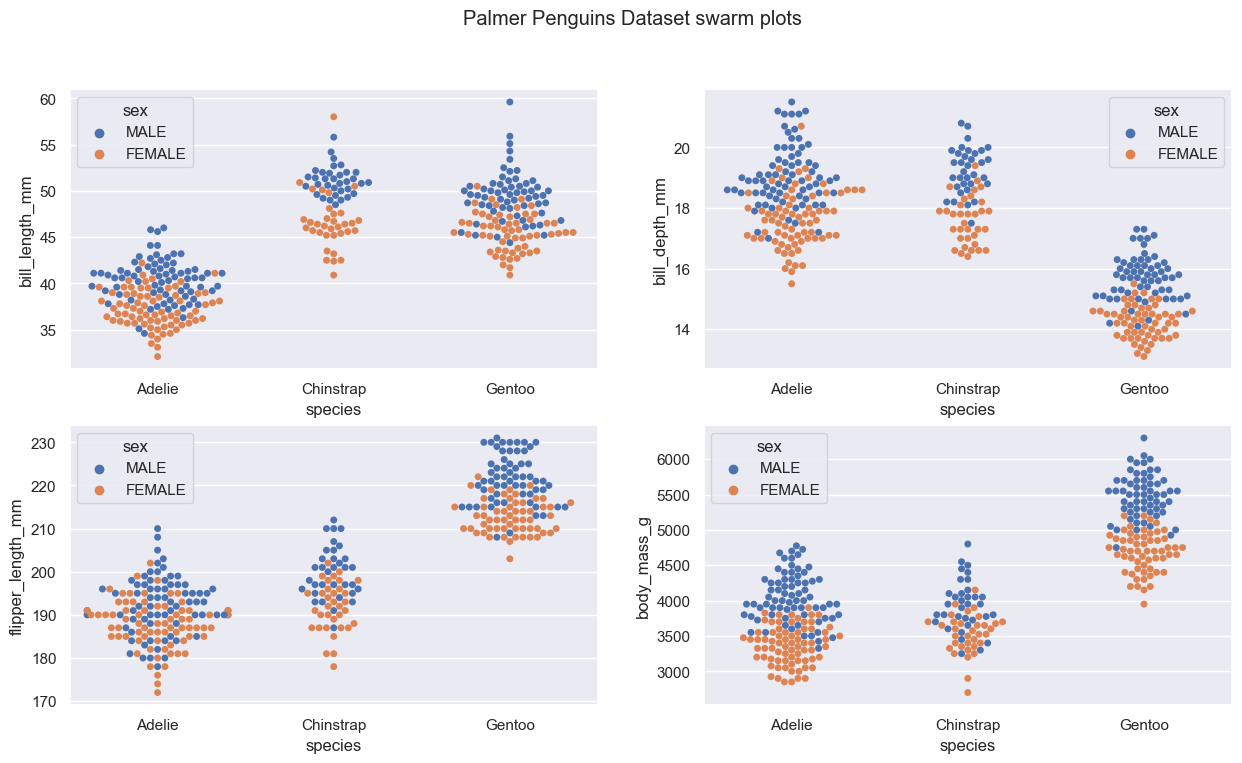

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.swarmplot(data=penguin, x='species', y='bill_length_mm', hue = 'sex', ax = ax [0, 0])
sns.swarmplot(data=penguin, x='species', y='bill_depth_mm', hue = 'sex', ax = ax [0, 1])
sns.swarmplot(data=penguin, x='species', y='flipper_length_mm', hue = 'sex', ax = ax [1, 0])
sns.swarmplot(data=penguin, x='species', y='body_mass_g', hue = 'sex', ax = ax [1, 1])



<Axes: xlabel='species', ylabel='body_mass_g'>

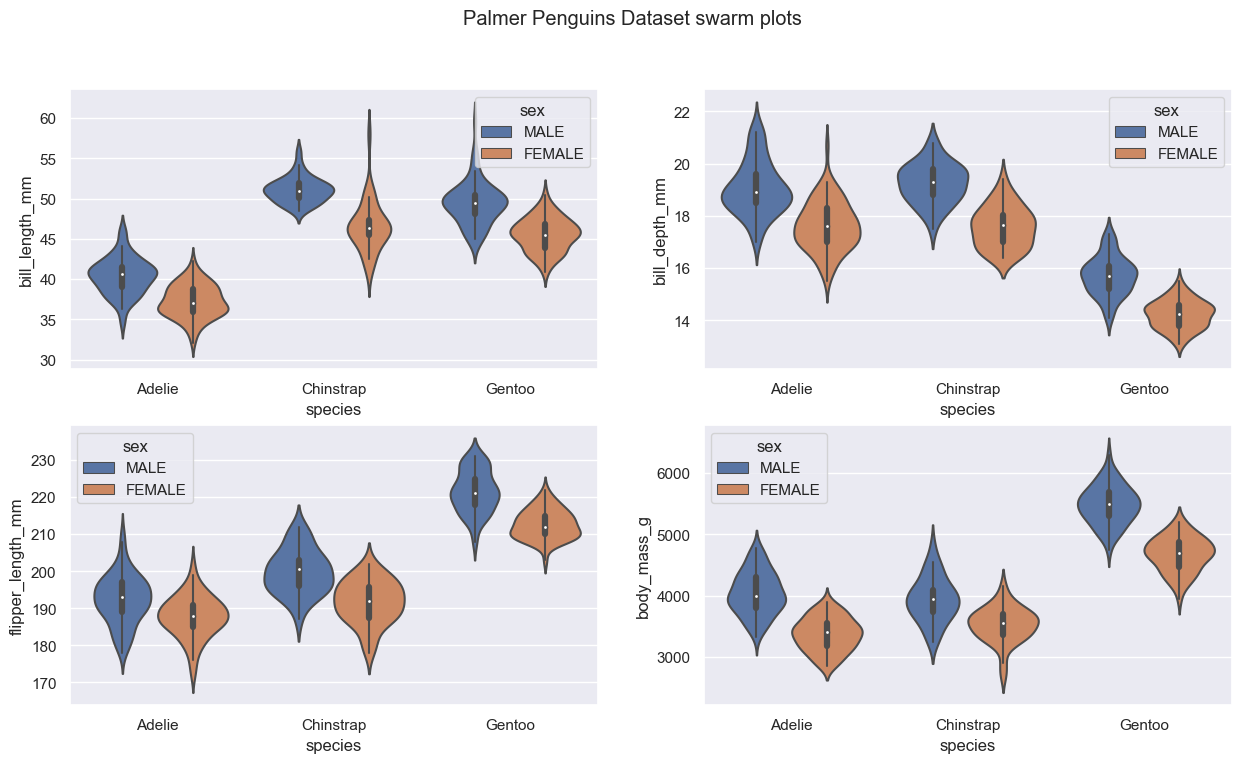

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.violinplot(data=penguin, x='species', y='bill_length_mm', hue = 'sex',  ax = ax [0, 0])
sns.violinplot(data=penguin, x='species', y='bill_depth_mm', hue = 'sex', ax = ax [0, 1])
sns.violinplot(data=penguin, x='species', y='flipper_length_mm', hue = 'sex', ax = ax [1, 0])
sns.violinplot(data=penguin, x='species', y='body_mass_g', hue = 'sex', ax = ax [1, 1])

<Axes: xlabel='species', ylabel='body_mass_g'>

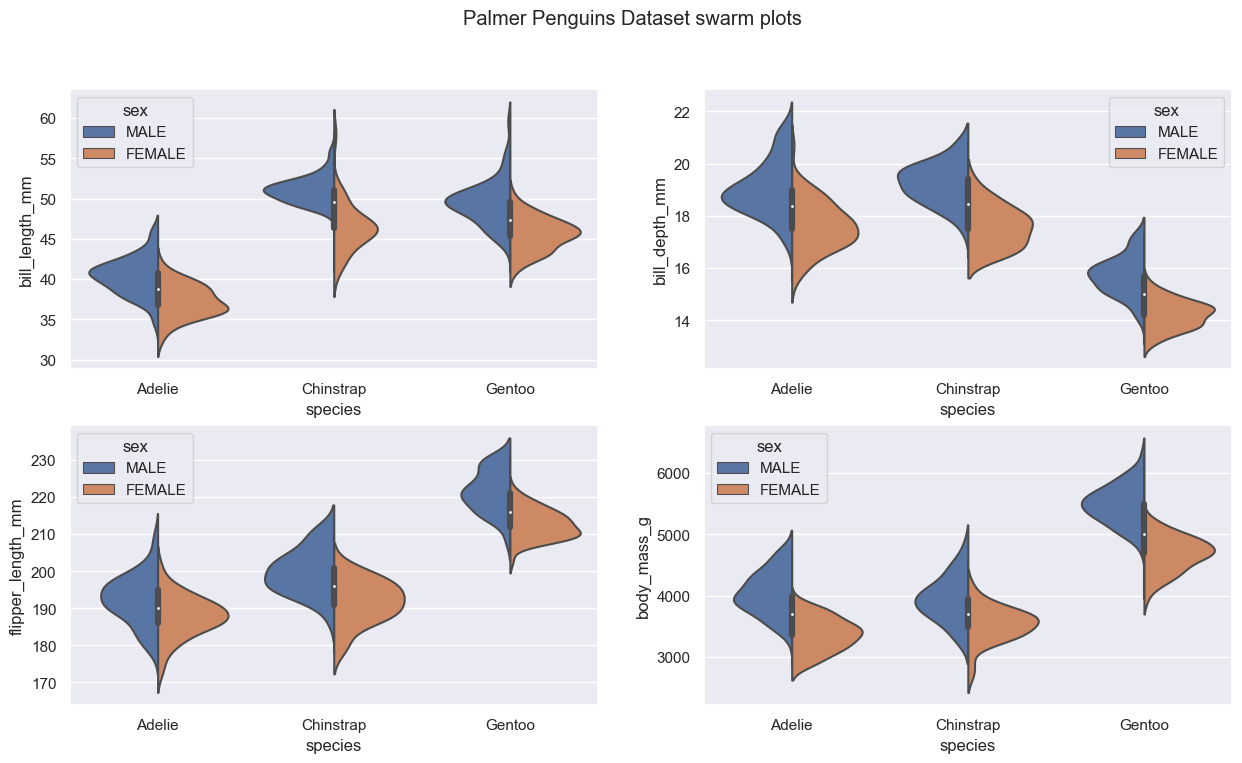

In [ ]:
fig, ax = plt.subplots(2, 2, figsize = (15, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

#creating chart for each subplot
sns.violinplot(data=penguin, x='species', y='bill_length_mm', hue = 'sex', split = True, ax = ax [0, 0])
sns.violinplot(data=penguin, x='species', y='bill_depth_mm', hue = 'sex', split = True, ax = ax [0, 1])
sns.violinplot(data=penguin, x='species', y='flipper_length_mm', hue = 'sex', split = True, ax = ax [1, 0])
sns.violinplot(data=penguin, x='species', y='body_mass_g', hue = 'sex', split = True, ax = ax [1, 1])



<Axes: xlabel='body_mass_g', ylabel='species'>

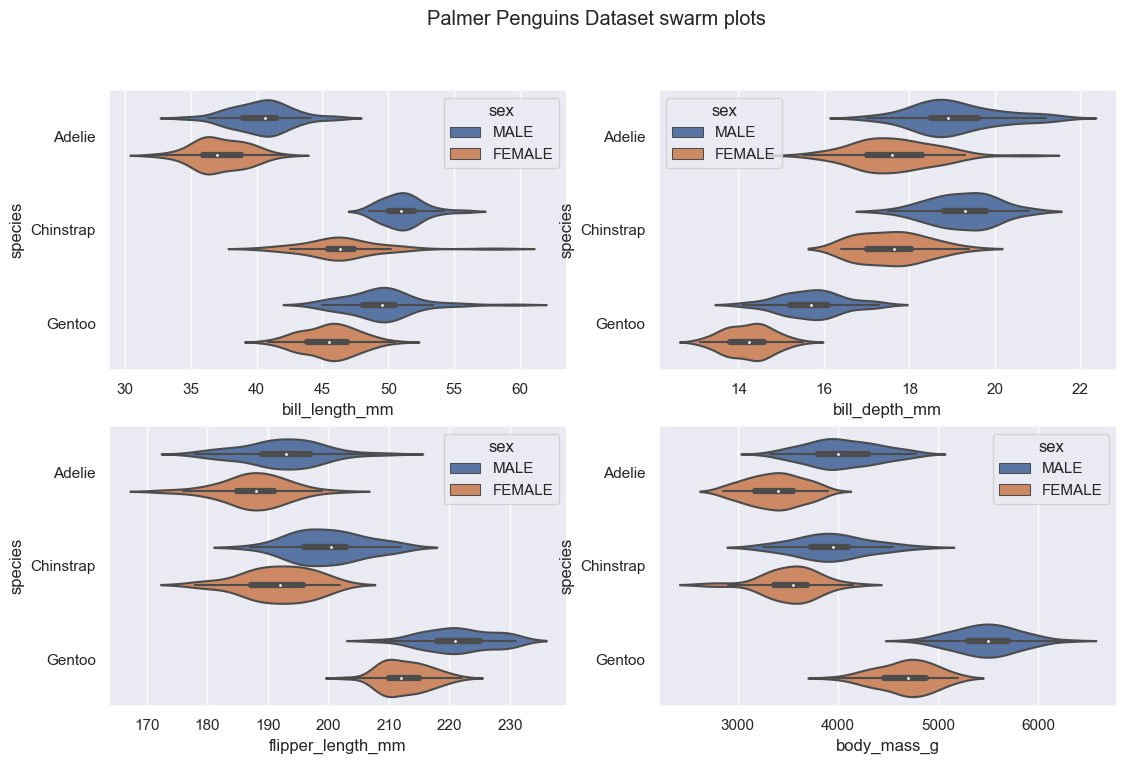

In [ ]:
#creating chart for each subplot

fig, ax = plt.subplots(2, 2, figsize = (13, 8))
fig.suptitle ('Palmer Penguins Dataset swarm plots')

sns.violinplot(data=penguin,  x='bill_length_mm', y='species', hue = 'sex', ax = ax [0, 0])
sns.violinplot(data=penguin,  x='bill_depth_mm', y='species', hue = 'sex', ax = ax [0, 1])
sns.violinplot(data=penguin,  x='flipper_length_mm', y='species', hue = 'sex', ax = ax [1, 0])
sns.violinplot(data=penguin,  x='body_mass_g', y='species', hue = 'sex', ax = ax [1, 1])


<Axes: xlabel='species', ylabel='bill_depth_mm'>

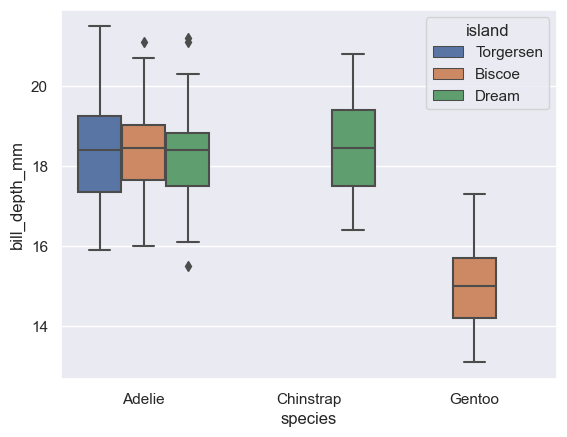

In [ ]:
sns.boxplot(data=penguin, x='species', y='bill_depth_mm', hue='island')

<Axes: xlabel='species', ylabel='bill_length_mm'>

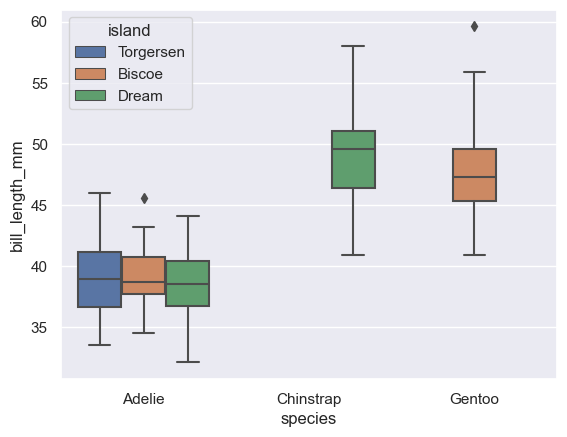

In [ ]:
sns.boxplot(data=penguin, x='species', y='bill_length_mm', hue='island')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


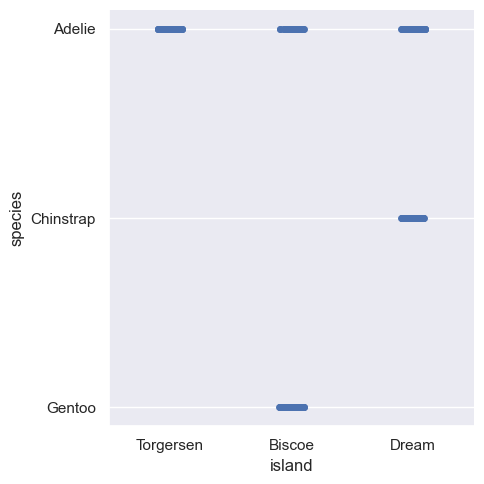

In [ ]:
sns.catplot(data=penguin, x="island", y="species")

### catplot of Palmer penguins Species vs Island seen

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


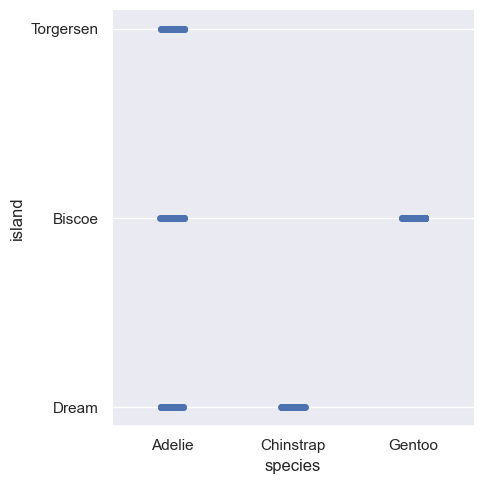

In [ ]:
sns.catplot(data=penguin, x='species', y='island')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


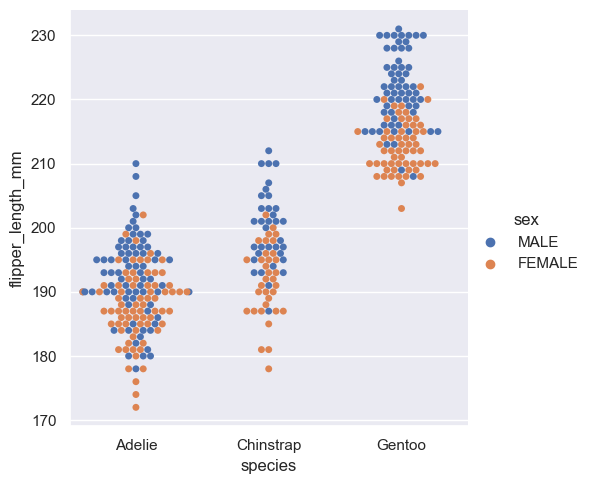

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'flipper_length_mm', hue = 'sex', kind = 'swarm')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


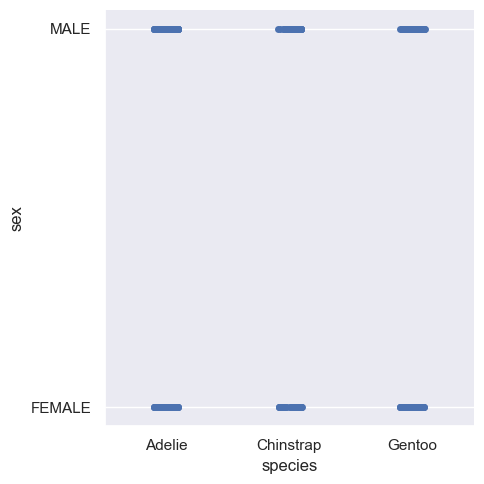

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'sex')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


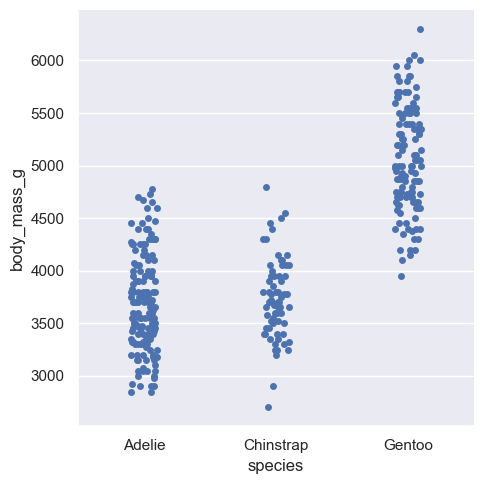

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


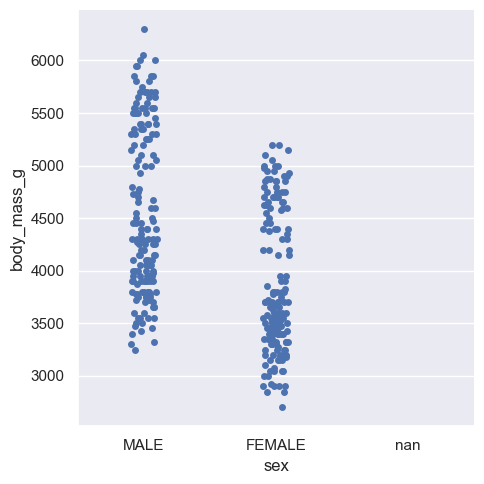

In [ ]:
sns.catplot(data=penguin, x= 'sex', y= 'body_mass_g')

### correlations
### mean weight for each species
male weighs more than female
male

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


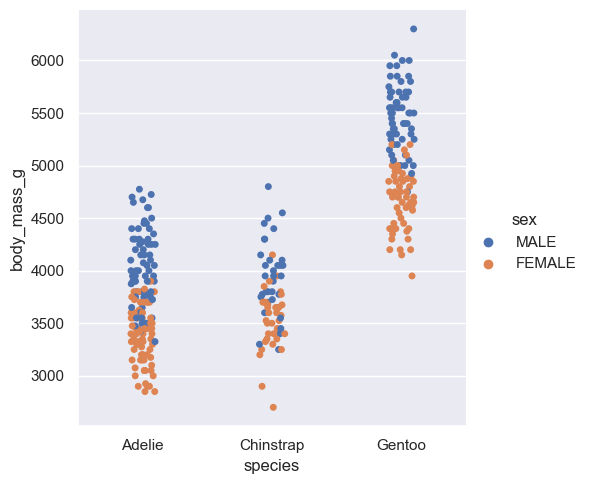

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g', hue = 'sex')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


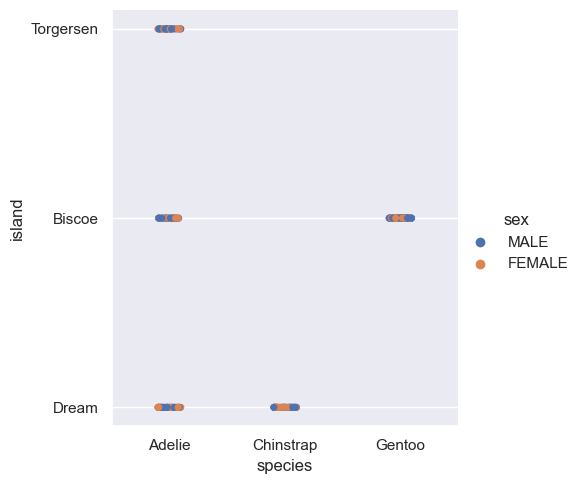

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'island', hue = 'sex') 


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


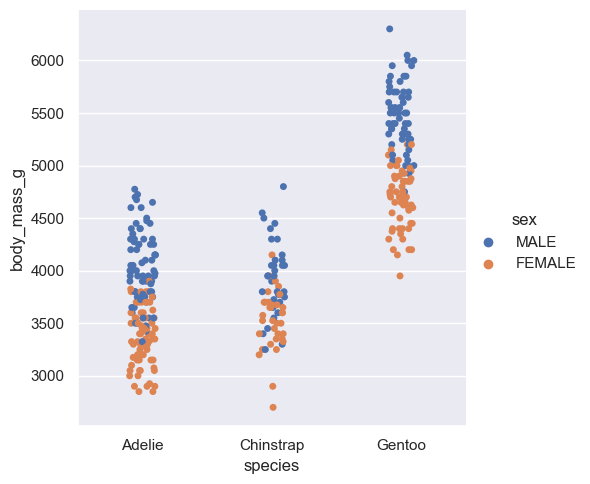

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'body_mass_g', hue = 'sex') 

In [ ]:
#correlation between specie and body mass
#correlation between sex and body mass

In [ ]:
#getting the numpy array
blength = blen.to_numpy()
print (blength)

[39.1 39.5 40.3  nan 36.7 39.3 38.9 39.2 34.1 42.  37.8 37.8 41.1 38.6
 34.6 36.6 38.7 42.5 34.4 46.  37.8 37.7 35.9 38.2 38.8 35.3 40.6 40.5
 37.9 40.5 39.5 37.2 39.5 40.9 36.4 39.2 38.8 42.2 37.6 39.8 36.5 40.8
 36.  44.1 37.  39.6 41.1 37.5 36.  42.3 39.6 40.1 35.  42.  34.5 41.4
 39.  40.6 36.5 37.6 35.7 41.3 37.6 41.1 36.4 41.6 35.5 41.1 35.9 41.8
 33.5 39.7 39.6 45.8 35.5 42.8 40.9 37.2 36.2 42.1 34.6 42.9 36.7 35.1
 37.3 41.3 36.3 36.9 38.3 38.9 35.7 41.1 34.  39.6 36.2 40.8 38.1 40.3
 33.1 43.2 35.  41.  37.7 37.8 37.9 39.7 38.6 38.2 38.1 43.2 38.1 45.6
 39.7 42.2 39.6 42.7 38.6 37.3 35.7 41.1 36.2 37.7 40.2 41.4 35.2 40.6
 38.8 41.5 39.  44.1 38.5 43.1 36.8 37.5 38.1 41.1 35.6 40.2 37.  39.7
 40.2 40.6 32.1 40.7 37.3 39.  39.2 36.6 36.  37.8 36.  41.5 46.5 50.
 51.3 45.4 52.7 45.2 46.1 51.3 46.  51.3 46.6 51.7 47.  52.  45.9 50.5
 50.3 58.  46.4 49.2 42.4 48.5 43.2 50.6 46.7 52.  50.5 49.5 46.4 52.8
 40.9 54.2 42.5 51.  49.7 47.5 47.6 52.  46.9 53.5 49.  46.2 50.9 45.5
 50.9 5

In [ ]:
bdept = bdepth.to_numpy()
print (bdept)

[18.7 17.4 18.   nan 19.3 20.6 17.8 19.6 18.1 20.2 17.1 17.3 17.6 21.2
 21.1 17.8 19.  20.7 18.4 21.5 18.3 18.7 19.2 18.1 17.2 18.9 18.6 17.9
 18.6 18.9 16.7 18.1 17.8 18.9 17.  21.1 20.  18.5 19.3 19.1 18.  18.4
 18.5 19.7 16.9 18.8 19.  18.9 17.9 21.2 17.7 18.9 17.9 19.5 18.1 18.6
 17.5 18.8 16.6 19.1 16.9 21.1 17.  18.2 17.1 18.  16.2 19.1 16.6 19.4
 19.  18.4 17.2 18.9 17.5 18.5 16.8 19.4 16.1 19.1 17.2 17.6 18.8 19.4
 17.8 20.3 19.5 18.6 19.2 18.8 18.  18.1 17.1 18.1 17.3 18.9 18.6 18.5
 16.1 18.5 17.9 20.  16.  20.  18.6 18.9 17.2 20.  17.  19.  16.5 20.3
 17.7 19.5 20.7 18.3 17.  20.5 17.  18.6 17.2 19.8 17.  18.5 15.9 19.
 17.6 18.3 17.1 18.  17.9 19.2 18.5 18.5 17.6 17.5 17.5 20.1 16.5 17.9
 17.1 17.2 15.5 17.  16.8 18.7 18.6 18.4 17.8 18.1 17.1 18.5 17.9 19.5
 19.2 18.7 19.8 17.8 18.2 18.2 18.9 19.9 17.8 20.3 17.3 18.1 17.1 19.6
 20.  17.8 18.6 18.2 17.3 17.5 16.6 19.4 17.9 19.  18.4 19.  17.8 20.
 16.6 20.8 16.7 18.8 18.6 16.8 18.3 20.7 16.6 19.9 19.5 17.5 19.1 17.
 17.9 18.

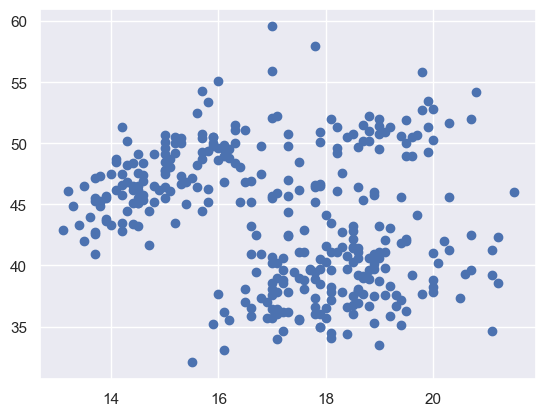

In [ ]:
#simple plot
plt.plot(bdept, blength, 'o')

c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


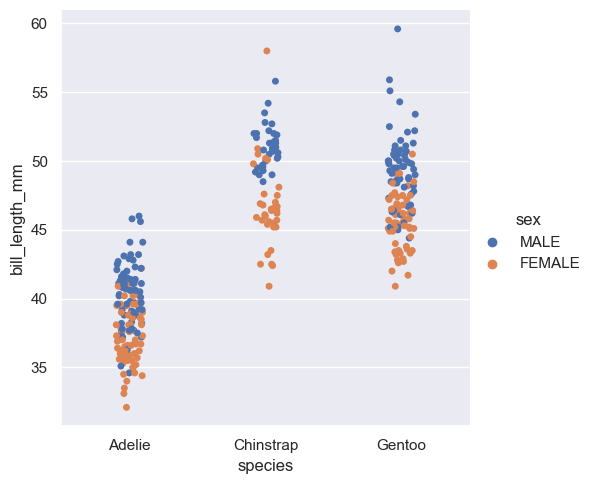

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'bill_length_mm', hue = 'sex')


c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


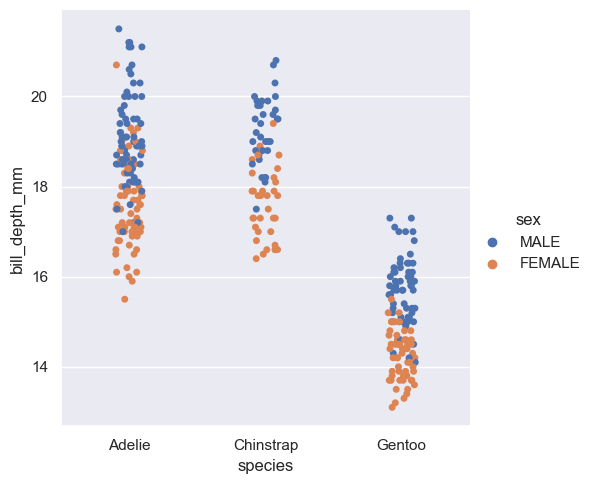

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'bill_depth_mm', hue = 'sex')



c:\ProgramData\anaconda3\Lib\site-packages\seaborn\axisgrid.py:118: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


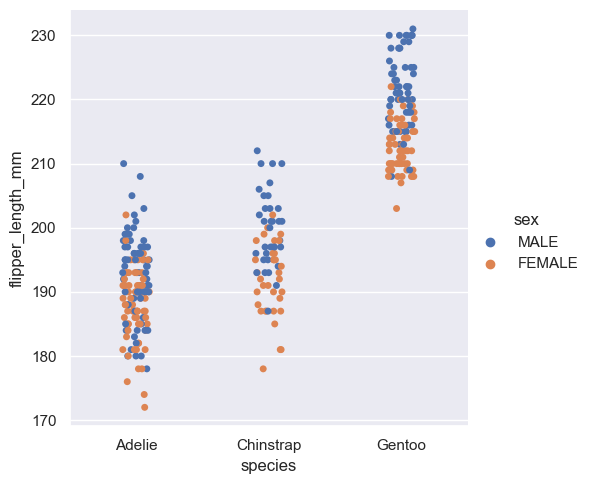

In [ ]:
sns.catplot(data=penguin, x= 'species', y= 'flipper_length_mm', hue = 'sex')

(0.0, 65.0)

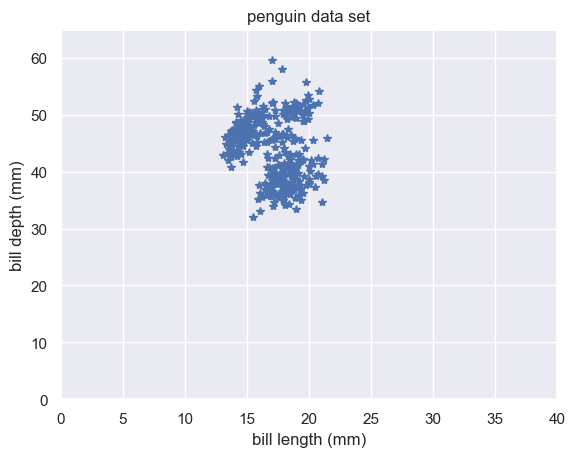

In [ ]:
#simple plot
plt.plot(bdept, blength, '*')
plt.xlabel('bill length (mm)')
plt.ylabel('bill depth (mm)')
plt.title('penguin data set')
#setting the axis limit
plt.xlim(0,40)
plt.ylim(0, 65)

(20.0, 65.0)

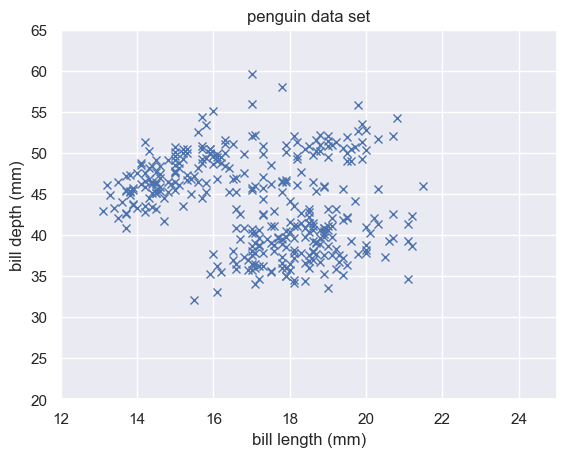

In [ ]:
#stateless
fig, ax = plt.subplots()
ax.plot(bdept, blength, 'x')
ax.set_xlabel('bill length (mm)')
ax.set_ylabel('bill depth (mm)')
ax.set_title('penguin data set')
#setting the axis limit
#x limit
ax.set_xlim(12,25)
#y limits
ax.set_ylim(20, 65)
#add best fit line




#$ is used at the beginning and at the end of the equation  to render it in mathematical equation
#y = mx + c is used to find the linear relationsship btw x and y while m and c ae constant

$ y = mx + c = p_1x^1 + p_o = p_1 x + po $

In [ ]:
#fitting a straight lin between bill lentgh and depth

m, c = np.polyfit (blength, bdept, 1)

# show 
#m, c

LinAlgError: SVD did not converge in Linear Least Squares

In [ ]:
bill_length, bl_counts = penguin['bill_length_mm'].value_counts()

ValueError: too many values to unpack (expected 2)

In [ ]:
plt.bar(bill_length, bl_counts, edgecolor='black')

NameError: name 'bill_length' is not defined

In [ ]:
plt.bar(values, counts, edgecolor='black')

In [ ]:
penguin['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [ ]:
penguin['island'].value_counts()

island
Biscoe       168
Dream        124
Torgersen     52
Name: count, dtype: int64

In [ ]:
penguin.describe()

,bill_length_mm,bill_depth_mm,flipper_length_mm,body_mass_g
count,342.000000,342.000000,342.000000,342.000000
mean,43.921930,17.151170,200.915205,4201.754386
std,5.459584,1.974793,14.061714,801.954536
min,32.100000,13.100000,172.000000,2700.000000
25%,39.225000,15.600000,190.000000,3550.000000
50%,44.450000,17.300000,197.000000,4050.000000
75%,48.500000,18.700000,213.000000,4750.000000
max,59.600000,21.500000,231.000000,6300.000000


In [ ]:
#converting to binary
345
f'{345:08b}'



'101011001'

In [ ]:
import numpy as np
print (np)

<module 'numpy' from 'c:\\ProgramData\\anaconda3\\Lib\\site-packages\\numpy\\__init__.py'>


In [ ]:

a = ([[1,2,3], [4,5,6], [7,8,9]])
a = np.array([[1,2,3], [4,5,6], [7,8,9]])
print (a)
a.dtype
a[:10]

[[1 2 3]
 [4 5 6]
 [7 8 9]]


array([[1, 2, 3],
       [4, 5, 6],
       [7, 8, 9]])

In [ ]:
np.random.randint(a)
np.unique(a) #displayes each unique or distint number


array([1, 2, 3, 4, 5, 6, 7, 8, 9])

In [ ]:
np.unique(a, return_counts=True)

(array([1, 2, 3, 4, 5, 6, 7, 8, 9]),
 array([1, 1, 1, 1, 1, 1, 1, 1, 1], dtype=int64))

In [ ]:
# using numpy to generate random number
b = np.random.randint(1, 8, 2000) #how many times 7 no will be gen from 2000
np.unique(b)
b[:1000]
np.unique(b, return_counts=True) #used for counting
#def 2 variables and assign them to each number and the freq of occurence
number, frequency = np.unique(b, return_counts=True)



In [ ]:
#def 2 variables and assign them to each number and the freq of occurence
number, frequency = np.unique(b, return_counts=True)
print (number, frequency)
print (frequency)


[1 2 3 4 5 6 7] [276 297 275 278 291 284 299]
[276 297 275 278 291 284 299]


In [ ]:
np.mean(b) #generate mean
np.std(b) #generate std deviation
np.median(b) #generate median


4.0

<BarContainer object of 7 artists>

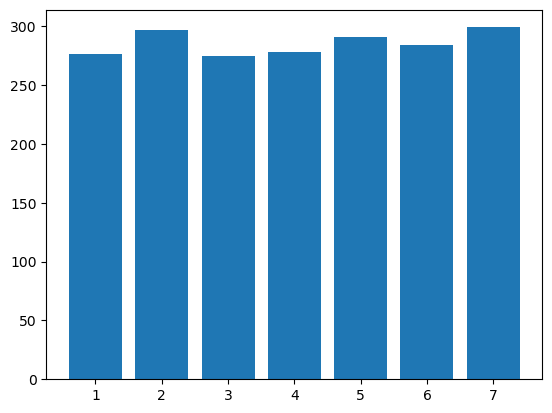

In [ ]:
#matplotlib is used for plotting bar charts in python
import matplotlib.pyplot as plt
#import numpy as np
#import matplotlib as mpl
plt.bar (number, frequency) #plot a bar chart of the 2 variables num, freq

In [ ]:
#generating random numbers with numpy
rng = np.random.default_rng()

In [ ]:
# Generate one random float uniformly distributed over the range [0, 1)
rng.random()  


0.1695659218761103

In [ ]:
# Generate an array of 10 numbers according to a unit Gaussian distribution.
rng.standard_normal(10)  

array([-0.72751635, -0.75330471, -0.77289158,  0.0717547 ,  0.960522  ,
        1.2816503 , -0.19313829, -0.24145012, -1.00474206,  0.25306592])

In [ ]:
# Generate an array of 5 integers uniformly over the range [0, 10).
rng.integers(low=0, high=10, size=5)

array([2, 1, 4, 5, 9], dtype=int64)

***
## End